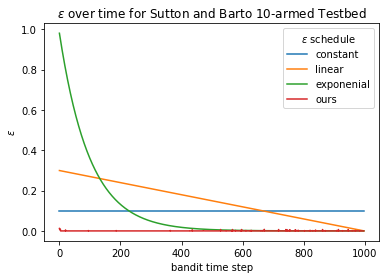

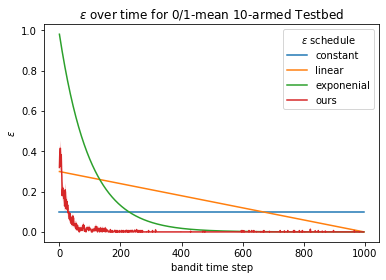

In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#import seaborn as sns; sns.set()

%matplotlib inline
ns = [15, 20, 22, 23]
def df(pattern):
    path = next(Path('/home/jovyan/').glob(pattern))
    array = np.load(str(path))
    n, d = array.shape
    indices = np.tile(np.arange(d), n)
    return pd.DataFrame(dict(y=array.flatten(), x=indices, pattern=pattern))


def _plot(*patterns, kind="line", ci="sd",**kwargs):
    data = pd.concat(df(p) for p in patterns)
    sns.relplot(x="x", y="y", hue="pattern", kind=kind, ci=ci, data=data);

    
def moving_average1(a, n=1):
    ret = np.cumsum(a, dtype=float, axis=1)
    ret[:, n:] = ret[:, n:] - ret[:, :-n]
    return ret[:, n - 1:] / n
    
def _plot(*patterns):
    for pattern in patterns:
        path = next(Path('/home/jovyan/').glob(pattern))
        array = moving_average1(np.load(str(path)))
        n, d = array.shape
        mean = array.mean(0)
        std = array.std(0)
        ste = std / np.sqrt(n)
        plt.plot(mean)
        plt.fill_between(np.arange(d), mean - ste, mean + ste, alpha=0.5)
    plt.show()
    
def plot(path, label):
    array = np.load(str(path))
    n, d = array.shape
    mean = array.mean(0)
    std = array.std(0)
    ste = std / np.sqrt(n)
    plt.plot(mean, label=label)
    plt.fill_between(np.arange(d), mean - ste, mean + ste, alpha=0.5)

datasets = ['sb', '01']
dataset_name = {'sb':'Sutton and Barto 10-armed Testbed', '01': '0/1-mean 10-armed Testbed'}
algos = ['const', 'linear', 'exp', 'our']
labels = dict(
    our='ours',
    const='constant',
    linear='linear',
    exp='exponenial'
)
for dataset in datasets:
    for algo in algos:
        path = next(Path('/home/jovyan/').glob(f'*/{dataset}/Teacher*/{algo}_epsilon.npy'))
        plot(path, labels[algo])
        
    plt.title(f'$\epsilon$ over time for {dataset_name[dataset]}')
    plt.legend(title='$\epsilon$ schedule')    
    plt.ylabel('$\epsilon$')
    plt.xlabel('bandit time step')
    plt.show()
#for n in ns:
#plot(f'*/sb/Teacher*/')

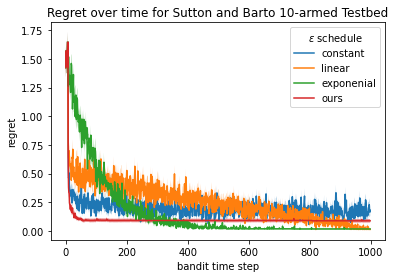

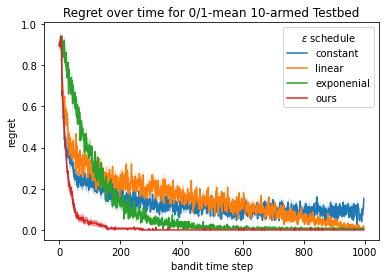

In [2]:
for dataset in datasets:
    for algo in algos:
        path = next(Path('/home/jovyan/').glob(f'*/{dataset}/Teacher*/{algo}_regret.npy'))
        plot(path, labels[algo])
        
    plt.title(f'Regret over time for {dataset_name[dataset]}')
    plt.legend(title='$\epsilon$ schedule')
    plt.ylabel('regret')
    plt.xlabel('bandit time step')
    plt.show()

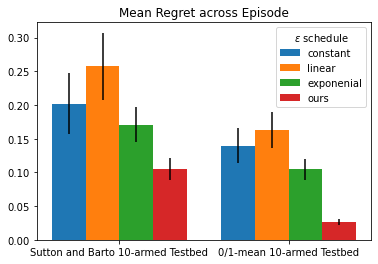

In [3]:
from collections import defaultdict

x = np.arange(len(datasets))  # the label locations
width = 0.1  # the width of the bars

means = defaultdict(list)
stds = defaultdict(list)

fig, ax = plt.subplots()

for algo in algos:
    for dataset in datasets:
        path = next(Path('/home/jovyan/').glob(f'*/{dataset}/Teacher*/{algo}_regret.npy'))
        array = np.load(str(path))
        n, d = array.shape
        std = array.std(0)
        ste = std / np.sqrt(n)
        means[algo] += [np.mean(array)]
        stds[algo] += [np.mean(ste)]

width = 1 / (1 + len(algos))
half = len(algos) * width / 2
indexes = np.arange(len(datasets))
for i, ((k1, v1), (k2, v2)) in enumerate(zip(means.items(), stds.items())):
    assert k1 == k2
    offset = i * width - half
    plt.bar(indexes + offset, v1, width, yerr=v2, label=labels[k1], align='edge')

ax.set_xticks(x)
ax.set_xticklabels([dataset_name[l] for l in dataset_name.keys()])
plt.legend(title='$\epsilon$ schedule')
plt.title('Mean Regret across Episode')
plt.show()
    #plt.set_xticklabels(algos)

    #plt.title(f'Regret over time for {dataset_name[dataset]}')
    #plt.legend(title='$\epsilon$ schedule')